In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

sns.set()
sns.set(font='SimHei')

F:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
dataSet = pd.read_csv('ershouche.csv')

In [3]:
dataSet.describe()

,id,price
count,2418.000000,2418.000000
mean,1209.500000,15.011452
std,698.160798,23.146995
min,1.000000,0.500000
25%,605.250000,4.600000
50%,1209.500000,8.980000
75%,1813.750000,17.997500
max,2418.000000,650.000000


In [4]:
tag_list = list()
dataSet['tag'].apply(lambda x:tag_list.extend(x.split('_')))
tag_list = list(set(tag_list))
tag_list

['会员6年',
 '手续齐全',
 '高配',
 '会员4年',
 '行驶证已验',
 '会员5年',
 '营转非',
 '低配',
 '可分期付',
 '会员3年',
 '会员2年',
 '会员1年']

In [5]:
df = pd.concat([dataSet, pd.DataFrame(columns=tag_list)], sort=False)
df[tag_list] = df[tag_list].fillna(0)
df['status'] = df['status'].fillna('否')
def set_status(series):
    tag = series['tag'].split('_')
    for t in tag:
        series[t] = 1
    return series

df[tag_list] = df[['tag', *tag_list]].apply(lambda x:set_status(x), axis=1).drop('tag', axis=1)
df = df.drop('tag', axis=1).drop('id', axis=1)
df

,brand,title,price,status,start_time,distance,volumn,gear,会员6年,手续齐全,高配,会员4年,行驶证已验,会员5年,营转非,低配,可分期付,会员3年,会员2年,会员1年
0,江铃,经典全顺 2009款 2.8T 手动 柴油多功能型短轴中顶JX493ZLQ3A-车况好一手车,4.50,急,2011年,11万公里,2.8升,手动,0,0,0,0,0,0,0,0,0,0,1,0
1,五菱,"宏光 2010款 1.2 手动 标准型-车况极品,无事故,无泡水",1.48,急,2011年,7万公里,1.2升,手动,0,0,0,0,0,0,0,0,0,0,0,1
2,奔驰,S级 2010款 S 350 L 4MATIC,36.80,否,2010年,11万公里,3.5升,自动,0,0,0,0,0,0,0,0,1,0,1,0
3,奥迪,"A3(进口)新能源 2017款 Sportback etron 舒适型,免税",2.98,否,2017年,2.6万公里,1.4升,自动,0,0,1,0,0,0,0,0,0,0,0,1
4,荣威,e550 2016款 旗舰版-车况原版 可分期,7.60,否,2015年,8万公里,1.8升,自动,0,0,0,0,0,0,0,1,0,0,0,1
5,宝马,7系 2016款 730Li 领先型-支持任何4s店维修厂检测,54.00,否,2016年,6万公里,2.0升,自动,0,0,0,0,0,0,0,1,1,0,0,1
6,吉普,广汽自由光 2017款 2.4L 领先版智能包-车况精品 可按揭 个人一手,16.28,否,2017年,2.3万公里,2.4升,自动,0,0,0,0,0,0,0,0,1,0,0,1
7,别克,英朗XT 2010款 XT 1.6T 时尚运动版,2.85,否,2010年,6.8万公里,1.6升,自动,0,0,0,0,0,0,0,0,1,0,0,1
8,金杯,海狮 2011款 2.0 手动 第五代新快运标准型4G20B-原版一手金杯,2.00,急,2012年,10万公里,2.0升,手动,0,0,0,0,0,0,0,0,0,0,0,1
9,荣威,950 2015款 1.8T 精英版-荣威 950 2015款 1.8T 精英版,6.98,急,2015年,6.8万公里,1.8升,自动,1,0,0,0,0,0,0,1,1,0,0,0


In [6]:
# 去除标题直接使用模型

df_drop_title = df.drop('title', axis=1)

# 平均价格最高的前三十个品牌

F:\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


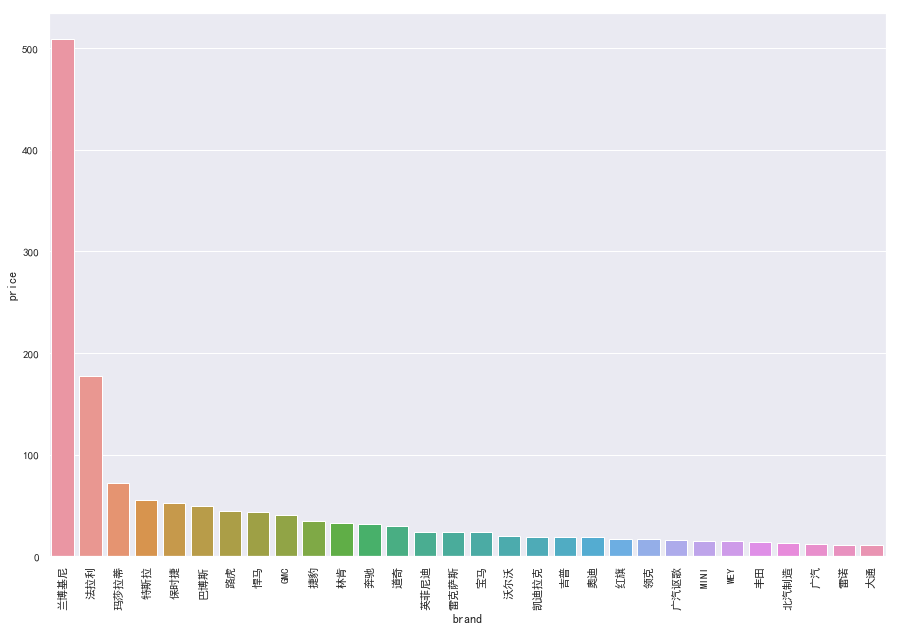

In [7]:
num_top = df_drop_title.groupby('brand')['price'].mean().sort_values(ascending=False)[:30]

fig = plt.figure(figsize=(15, 10))

sns.barplot(num_top.index, num_top)
plt.xticks(rotation=90)
fig.show()

# 待出售数量最多的前三十品牌

F:\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


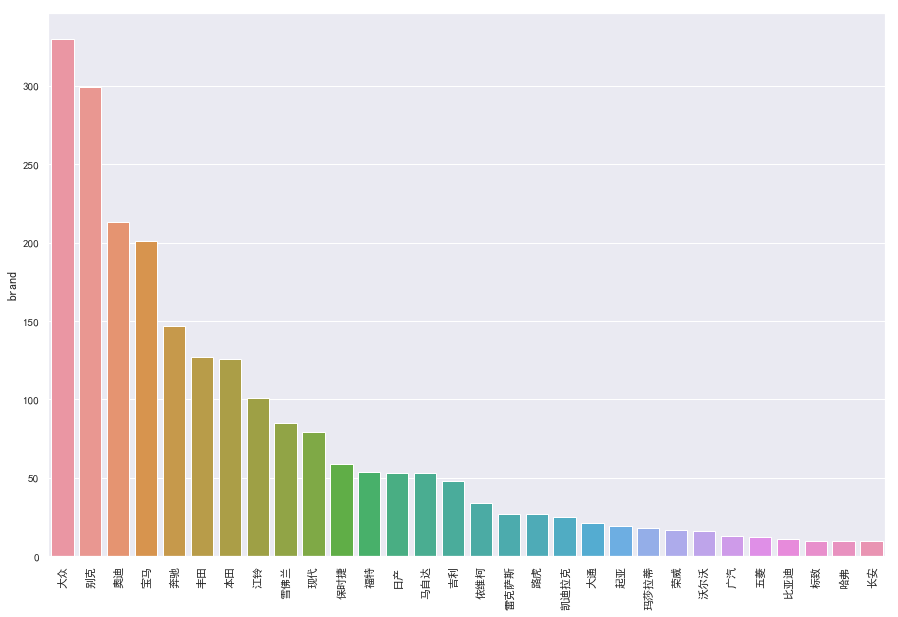

In [8]:
num_top = df_drop_title['brand'].value_counts().sort_values(ascending=False)[:30]
fig = plt.figure(figsize=(15, 10))

sns.barplot(num_top.index, num_top)
plt.xticks(rotation=90)
fig.show()

# 各大品牌车系数量占有比重前30位

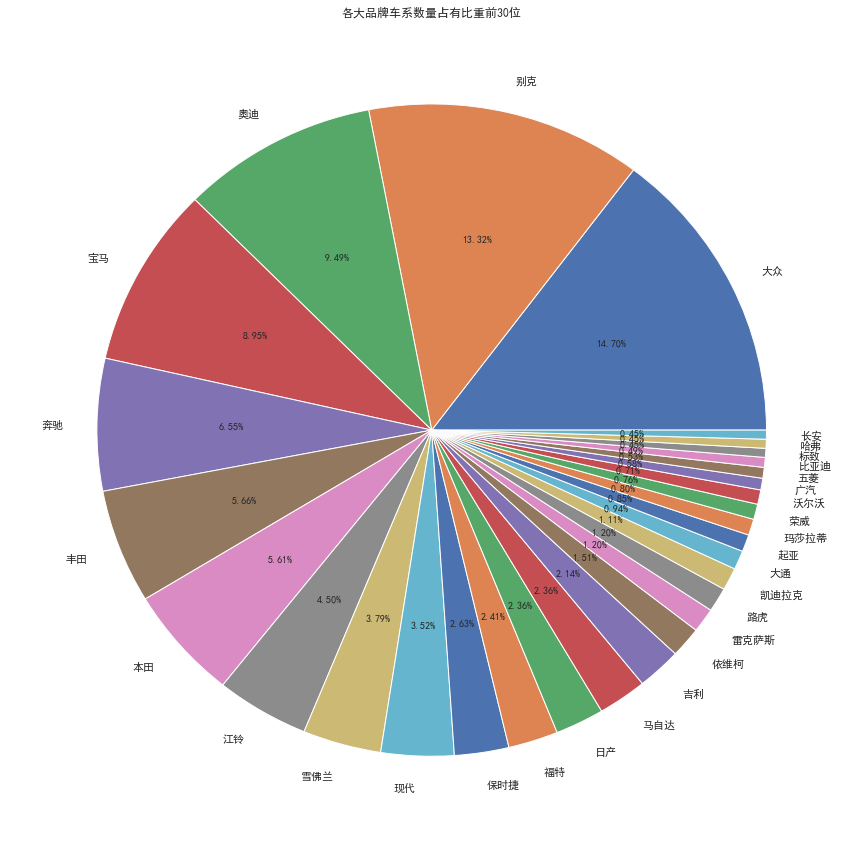

In [9]:
fig = plt.figure(figsize=(15, 15))
plt.pie(num_top, labels=num_top.index, autopct='%1.2f%%')
plt.title("各大品牌车系数量占有比重前30位")
plt.show()

# 对大众车辆价格进行分区并显示各区的概率

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':


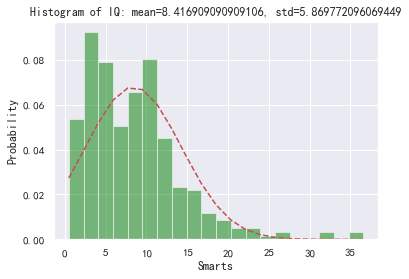

In [10]:
df_dazhong = df_drop_title[df_drop_title['brand'] == '大众']
dazhong_mean = df_dazhong['price'].mean()
dazhong_std = df_dazhong['price'].std()

num_bins = 20 # 条状图数量

n, bins, patches = plt.hist(df_dazhong['price'], num_bins, normed=1, facecolor='green', alpha=0.5)

y = mlab.normpdf(bins, dazhong_mean, dazhong_std)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: mean={}, std={}'.format(dazhong_mean, dazhong_std))

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [11]:
# 特征工程

df_drop_title['distance'] = df_drop_title['distance'].apply(lambda x:float(x[:-3]))
df_drop_title['start_time'] = df_drop_title['start_time'].apply(lambda x:int(x[:-1]))
df_drop_title = df_drop_title[ ~ df_drop_title['volumn'].str.contains('电动') ]  # 去除电动的汽车(共4行记录)
df_drop_title['volumn'] = df_drop_title['volumn'].apply(lambda x:float(x[:-1]))

In [12]:
df_drop_title = df_drop_title.reset_index().drop('index', axis=1)

In [13]:
one_hot_list = pd.get_dummies(df_drop_title[['brand', 'status', 'gear']])
df_result = df_drop_title.drop('brand', axis=1).drop('status', axis=1).drop('gear', axis=1)
df_result = pd.merge(df_result, one_hot_list, left_index=True, right_index=True)
df_result

,price,start_time,distance,volumn,会员6年,手续齐全,高配,会员4年,行驶证已验,会员5年,...,brand_雪铁龙,brand_雷克萨斯,brand_雷诺,brand_领克,brand_风行,brand_马自达,status_否,status_急,gear_手动,gear_自动
0,4.50,2011,11.00,2.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1.48,2011,7.00,1.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,36.80,2010,11.00,3.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2.98,2017,2.60,1.4,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,7.60,2015,8.00,1.8,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,54.00,2016,6.00,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6,16.28,2017,2.30,2.4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7,2.85,2010,6.80,1.6,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8,2.00,2012,10.00,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9,6.98,2015,6.80,1.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [14]:
X = df_result[df_result.columns.difference(['price'])].values
Y = df_result['price'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
ada = AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=20), learning_rate=0.00003).fit(X_train, Y_train)
pred = ada.predict(X_test)
pd.DataFrame(np.concatenate((Y_test.reshape(-1,1), pred.reshape(-1,1)),axis=1), columns=['pred', 'Y_test'])

,pred,Y_test
0,5.99,3.792643
1,25.90,21.108500
2,10.80,10.749000
3,9.92,10.679000
4,4.78,3.630500
5,92.00,64.289000
6,9.70,8.850345
7,28.88,30.941564
8,46.99,60.155000
9,12.98,15.421500


In [16]:
print ("MAE:",metrics.mean_absolute_error(Y_test, pred))

# calculate MSE using scikit-learn
print ("MSE:",metrics.mean_squared_error(Y_test, pred))

# calculate RMSE using scikit-learn
print ("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, pred)))

# calculate R2 using scikit-learn
print ("R2:",metrics.r2_score(Y_test, pred))

MAE: 2.817054404808442
MSE: 30.231815398072094
RMSE: 5.498346605850898
R2: 0.9433841072705629
